## Example for xrd-cossim-vs-csv.py

: generate structures with various volumes and corresponding XRD patterns, <br>
  and confirm the highest cosine similarity of the generated XRD with respect to the target XRD csv file.

ex) 
> python ./xrd-cossim-vs-csv.py [target csv] [cif file]

#### additional_INPUT.csv
- **xray_wavelength** : XRD source wavelength for pymatgen option.
- **xrd_sigma** : smearing factor (default : 0.5)
- **bool_gsas** : XRD is generated from GSAS-II (True). <br>
  Otherwise, it is generated from pymatgen (False)
- **volume_list** : volumes for generating structures of cif file

#### INST_XRD.PRM (necessary when bool_gsas is True)
- 5th row includes the information of x-ray source wavelength. This is prior to info. of additional_INPUT.csv.

In [8]:
!python ./xrd-cossim-vs-csv.py MgO_xrd.csv MgO_test.cif

GSAS-II binary directory: /home/e1739/GSASII/bindist
/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.cif read by Reader CIF
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
Simulating 18001 points from 0.0 to 180.0 degrees 2theta
Instrument parameters read: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/INST_XRY.PRM bank 1
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 27014 with 18001 obs.
Read from file:/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.bak0.gpx
Save to file  :/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
GPX file save successful
 Refinement results are in file: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.lst
 ***** Refinement successful *****
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.cif read by Reader CIF
gpx file saved as /ho

gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 35861 with 18001 obs.
Read from file:/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.bak0.gpx
Save to file  :/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
GPX file save successful
 Refinement results are in file: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.lst
 ***** Refinement successful *****
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
75.54938503168 0.98 0.8774256268999493
/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.cif read by Reader CIF
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
Simulating 18001 points from 0.0 to 180.0 degrees 2theta
Instrument parameters read: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/INST_XRY.PRM bank 1
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
 Hessian Levenberg-Marquardt SVD ref

Read from file:/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.bak0.gpx
Save to file  :/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
GPX file save successful
 Refinement results are in file: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.lst
 ***** Refinement successful *****
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
84.80033013760001 1.1 0.011015710191161121
/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.cif read by Reader CIF
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
Simulating 18001 points from 0.0 to 180.0 degrees 2theta
Instrument parameters read: /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/INST_XRY.PRM bank 1
gpx file saved as /home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 67117 with 18001 obs.
Read from file:/home/e1739/util_for_xrd-230615/cossim_vs_xrdcsv/sim.bak0.gpx
Save to file  :/home/e1739/uti

Check files list. <br>
- [target]_xrd.csv includes 2theta, XRD intensity 
- [target]_xrd_smeared.csv includes 2theta, smeared XRD intensity
- exp_cos_similarity_xrd_volchanged.csv indlues the maximum cosine similarity of XRD
- [target]_volchanged.cif is the structure with changed volume and maximum cosine similarity of XRD

In [9]:
!ls

INST_XRY.PRM			     additional_INPUT.csv
MgO_test.cif			     exp_cos_similarity_xrd_volchanged.csv
MgO_test_volchanged.cif		     sim.bak0.gpx
MgO_test_volchanged_smeared_xrd.csv  sim.gpx
MgO_test_volchanged_xrd.csv	     sim.lst
MgO_xrd.csv			     xrd-cossim-vs-csv.ipynb
MgO_xrd_smeared_xrd.csv		     xrd-cossim-vs-csv.py


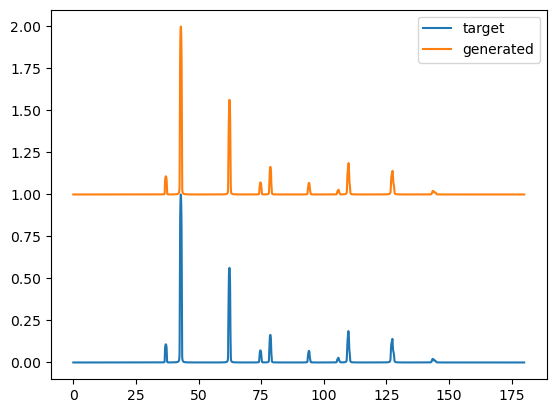

In [10]:
# comparison of XRD with maximum cosine similarity (min-max normalized)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

chi1 = pd.read_csv('MgO_xrd_smeared_xrd.csv',header=None)
chi2 = pd.read_csv('MgO_test_volchanged_smeared_xrd.csv',header=None)
plt.plot(chi1.iloc[:,0],chi1.iloc[:,1]/max(chi1.iloc[:,1]),label='target')
plt.plot(chi2.iloc[:,0],1+chi2.iloc[:,1]/max(chi2.iloc[:,1]),label='generated')
plt.legend()
plt.show()